In [1]:
import joblib 
import numpy as np
import pandas as pd
# import talib as ta
import talib.abstract as ta
# import pandas_ta as ta
from ta import add_all_ta_features
import joblib

# from mplfinance.original_flavor import candlestick_ohlc
import seaborn as sns
import matplotlib.pyplot as plt
# import matplotlib.dates as mpdates
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
df = joblib.load('data/populated.joblib')


##15 + 7 = 22 days data
start = '2023-02-01'
end = '2023-02-22'
df = df.loc[start:end]

# df.dropna(inplace=True)

# df = df.reset_index()

# create a StandardScaler object
scaler = StandardScaler()

# normalize the data in the DataFrame
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(df.shape)
df.tail(3)

(6336, 869)


,open,high,low,close,volume,%-BTCUSDTpct-change,%-BTCUSDTraw_volume,%-BTCUSDTraw_close,%-BTCUSDTraw_open,%-BTCUSDTraw_high,...,%-BTCUSDTmacdsignal_shift-5,%-BTCUSDTmacdhist_shift-5,%-BTCUSDTao_shift-5,%-BTCUSDTuo_shift-5,%-BTCUSDTaroonup_shift-5,%-BTCUSDTaroondown_shift-5,%-BTCUSDTaroonosc_shift-5,%-BTCUSDTsar_shift-5,%-BTCUSDThtsine_shift-5,%-BTCUSDThtleadsine_shift-5
6333,0.245136,0.247451,0.255360,0.266040,-0.317086,0.498933,-0.317086,0.266040,0.245136,0.247451,...,1.753710,1.460371,2.451510,1.535106,1.294133,-1.308627,1.540153,0.186743,0.308828,-0.754245
6334,0.266173,0.271482,0.291117,0.293284,-0.266612,0.646787,-0.266612,0.293284,0.266173,0.271482,...,1.857742,1.303199,2.422175,1.749498,1.096227,-1.308627,1.422333,0.212336,0.161420,-0.853223
6335,0.293416,0.276167,0.303996,0.282084,-0.452672,-0.271533,-0.452672,0.282084,0.293416,0.276167,...,1.927943,0.878241,2.274348,0.949860,0.898322,-0.908005,1.068875,0.227675,-0.016946,-0.962366


In [3]:
def double_barrier_method(data, tp, sl):    
    d = pd.DataFrame(data, columns=['price'])
    d['returns'] =  d['price'].pct_change()
    d['cumulative_returns'] = (1 + d['returns']).cumprod() - 1
    d['action'] = np.nan

    for i in range(len(d['action'])):
        threshould = 0
        for j in range(i, len(d['cumulative_returns'])):
            ## Calculate threshould
            threshould = threshould + d['returns'].iloc[j]
            
            if threshould >= tp:
                d['action'].iloc[i] = 0
                break

            if threshould <= sl:
                d['action'].iloc[i] = 1
                break

    return np.array(d['action'].shift())



df['&-dbm'] =  double_barrier_method(np.array(df['close']), 0.03, -0.01)
df.dropna(inplace=True)
df.head(10)

,open,high,low,close,volume,%-BTCUSDTpct-change,%-BTCUSDTraw_volume,%-BTCUSDTraw_close,%-BTCUSDTraw_open,%-BTCUSDTraw_high,...,%-BTCUSDTmacdhist_shift-5,%-BTCUSDTao_shift-5,%-BTCUSDTuo_shift-5,%-BTCUSDTaroonup_shift-5,%-BTCUSDTaroondown_shift-5,%-BTCUSDTaroonosc_shift-5,%-BTCUSDTsar_shift-5,%-BTCUSDThtsine_shift-5,%-BTCUSDThtleadsine_shift-5,&-dbm
2,-0.634666,-0.619467,-0.629943,-0.596070,-0.094946,0.956469,-0.094946,-0.596070,-0.634666,-0.619467,...,0.300182,0.501604,-0.579495,-0.684923,-1.308627,0.361957,-0.394505,-1.561163,-1.180072,0.0
3,-0.595768,-0.619467,-0.604337,-0.626795,-0.368659,-0.764748,-0.368659,-0.626795,-0.595768,-0.619467,...,0.437088,0.584139,-0.400755,-0.882829,-1.308627,0.244137,-0.404061,-1.626401,-0.957837,1.0
4,-0.626644,-0.611457,-0.604337,-0.593497,-0.378286,0.821099,-0.378286,-0.593497,-0.626644,-0.611457,...,0.346639,0.677731,-0.572261,-1.080735,-1.308627,0.126318,-0.413234,-1.530542,-0.570309,0.0
5,-0.593195,-0.616898,-0.628579,-0.646925,-0.392676,-1.326589,-0.392676,-0.646925,-0.593195,-0.616898,...,0.329832,0.771023,-0.899206,-1.278640,0.293858,-0.934059,-0.422041,0.139973,1.041260,1.0
6,-0.646774,-0.641835,-0.702367,-0.639206,1.192951,0.187281,1.192951,-0.639206,-0.646774,-0.641835,...,0.027696,0.713502,-1.395603,-1.278640,0.093548,-0.816239,-0.430495,1.254806,1.355932,0.0
7,-0.639206,-0.622037,-0.614033,-0.603032,-0.465986,0.892839,-0.465986,-0.603032,-0.639206,-0.622037,...,0.012064,0.638367,-0.673956,-1.278640,1.495722,-1.640977,-0.438612,1.583331,1.172375,1.0
8,-0.603033,-0.583346,-0.585700,-0.610903,-0.182788,-0.199076,-0.182788,-0.610903,-0.603033,-0.583346,...,-0.153377,0.564523,-0.884242,0.898322,1.295412,-0.227141,-0.450649,1.518650,0.542550,1.0
9,-0.610903,-0.602238,-0.585700,-0.584718,-0.372187,0.644355,-0.372187,-0.584718,-0.610903,-0.602238,...,-0.099430,0.474170,-0.526760,0.700416,1.095101,-0.227141,-0.461964,0.798649,-0.362046,1.0
10,-0.584720,-0.596646,-0.576761,-0.601367,-0.342261,-0.416124,-0.342261,-0.601367,-0.584720,-0.596646,...,-0.322753,0.310860,-1.444835,0.502510,0.894790,-0.227141,-0.472600,-0.852326,-1.310346,1.0
11,-0.601217,-0.622037,-0.599488,-0.623011,-0.477534,-0.540074,-0.477534,-0.623011,-0.601217,-0.622037,...,-0.416825,0.158676,-0.303564,0.304605,1.495722,-0.698420,-0.482598,-1.544252,-1.202083,0.0


In [4]:
Y = df[['&-dbm']]
X = df.drop(columns=["&-dbm"])


print(X.columns)
print(X.shape)
print(X.info())

X.tail()

Index(['open', 'high', 'low', 'close', 'volume', '%-BTCUSDTpct-change',
       '%-BTCUSDTraw_volume', '%-BTCUSDTraw_close', '%-BTCUSDTraw_open',
       '%-BTCUSDTraw_high',
       ...
       '%-BTCUSDTmacdsignal_shift-5', '%-BTCUSDTmacdhist_shift-5',
       '%-BTCUSDTao_shift-5', '%-BTCUSDTuo_shift-5',
       '%-BTCUSDTaroonup_shift-5', '%-BTCUSDTaroondown_shift-5',
       '%-BTCUSDTaroonosc_shift-5', '%-BTCUSDTsar_shift-5',
       '%-BTCUSDThtsine_shift-5', '%-BTCUSDThtleadsine_shift-5'],
      dtype='object', length=869)
(6334, 869)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6334 entries, 2 to 6335
Columns: 869 entries, open to %-BTCUSDThtleadsine_shift-5
dtypes: float64(869)
memory usage: 42.0 MB
None


,open,high,low,close,volume,%-BTCUSDTpct-change,%-BTCUSDTraw_volume,%-BTCUSDTraw_close,%-BTCUSDTraw_open,%-BTCUSDTraw_high,...,%-BTCUSDTmacdsignal_shift-5,%-BTCUSDTmacdhist_shift-5,%-BTCUSDTao_shift-5,%-BTCUSDTuo_shift-5,%-BTCUSDTaroonup_shift-5,%-BTCUSDTaroondown_shift-5,%-BTCUSDTaroonosc_shift-5,%-BTCUSDTsar_shift-5,%-BTCUSDThtsine_shift-5,%-BTCUSDThtleadsine_shift-5
6331,0.238325,0.227955,0.244299,0.227294,-0.339550,-0.268504,-0.339550,0.227294,0.238325,0.227955,...,1.485688,2.133944,2.084076,2.246007,1.294133,-1.108316,1.422333,0.116444,0.410044,-0.681519
6332,0.227579,0.224781,0.253542,0.245002,-0.466949,0.419603,-0.466949,0.245002,0.227579,0.224781,...,1.637166,1.899184,2.313190,2.184901,1.492039,-1.308627,1.657973,0.154751,0.407870,-0.683124
6333,0.245136,0.247451,0.255360,0.266040,-0.317086,0.498933,-0.317086,0.266040,0.245136,0.247451,...,1.753710,1.460371,2.451510,1.535106,1.294133,-1.308627,1.540153,0.186743,0.308828,-0.754245
6334,0.266173,0.271482,0.291117,0.293284,-0.266612,0.646787,-0.266612,0.293284,0.266173,0.271482,...,1.857742,1.303199,2.422175,1.749498,1.096227,-1.308627,1.422333,0.212336,0.161420,-0.853223
6335,0.293416,0.276167,0.303996,0.282084,-0.452672,-0.271533,-0.452672,0.282084,0.293416,0.276167,...,1.927943,0.878241,2.274348,0.949860,0.898322,-0.908005,1.068875,0.227675,-0.016946,-0.962366


In [5]:
Y

,&-dbm
2,0.0
3,1.0
4,0.0
5,1.0
6,0.0
...,...
6331,1.0
6332,1.0
6333,0.0
6334,0.0


In [6]:
# features = ["%-AVAX/USDTmom-period_14_shift-1_5m", "%-AVAX/USDTroc-period_14_5m", "%-AVAX/USDTroc-period_14_shift-1_5m", "%-AVAX/USDTmom-period_14_5m", "%-AVAX/USDTwillr-period_21_5m", "%-AVAX/USDTcci-period_21_5m", "%-AVAX/USDTcci-period_20_5m", "%-AVAX/USDTrsi-period_14_5m", "%-AVAX/USDTwbb_percent_24_5m", "%-AVAX/USDTwillr-period_24_5m", "%-AVAX/USDTcci-period_24_5m", "%-AVAX/USDTrsi-period_9_5m", "%-AVAX/USDTwbb_percent_21_5m", "%-AVAX/USDTlinearreg_angle-period_20_5m", "%-AVAX/USDTcci-period_24_shift-1_5m", "%-AVAX/USDTwillr-period_20_5m", "%-AVAX/USDTrsi-period_12_5m", "%-AVAX/USDTlinearreg_slope-period_20_5m", "%-AVAX/USDTlinearreg_slope-period_21_5m", "%-AVAX/USDTcci-period_20_shift-1_5m", "%-AVAX/USDTmom-period_12_shift-2_5m", "%-AVAX/USDTrsi-period_10_5m", "%-AVAX/USDTwbb_percent_20_5m", "%-AVAX/USDTrsi-period_10_shift-1_5m", "%-AVAX/USDTcci-period_14_5m", "%-AVAX/USDTmom-period_12_shift-3_5m", "%-AVAX/USDTwbb_percent_14_5m", "%-AVAX/USDTlinearreg_slope-period_14_shift-1_5m", "%-AVAX/USDTcci-period_21_shift-1_5m", "%-AVAX/USDTroc-period_12_5m", "%-AVAX/USDTlinearreg_angle-period_14_shift-2_5m", "%-AVAX/USDTmom-period_14_shift-2_5m", "%-AVAX/USDTwillr-period_20_shift-1_5m", "%-AVAX/USDTroc-period_14_shift-2_5m", "%-AVAX/USDTwbb_percent_12_5m", "%-AVAX/USDTtrix-period_5_5m", "%-AVAX/USDTlinearreg_angle-period_21_5m", "%-AVAX/USDTmom-period_12_5m", "%-AVAX/USDTaroonosc_5m", "%-AVAX/USDTmfi-period_14_5m", "%-AVAX/USDTroc-period_12_shift-3_5m", "%-AVAX/USDTmom-period_20_5m", "%-AVAX/USDTlinearreg_angle-period_14_shift-3_5m", "%-AVAX/USDTcci-period_20_shift-2_5m", "%-AVAX/USDTlinearreg_slope-period_14_shift-2_5m", "%-AVAX/USDTwillr-period_21_shift-1_5m", "%-AVAX/USDTroc-period_12_shift-1_5m", "%-AVAX/USDTroc-period_9_shift-6_5m", "%-AVAX/USDTrsi-period_14_shift-1_5m", "%-AVAX/USDTmom-period_12_shift-1_5m", "%-AVAX/USDTlinearreg_angle-period_14_5m", "%-AVAX/USDTlinearreg_slope-period_12_shift-4_5m", "%-AVAX/USDTroc-period_20_5m", "%-AVAX/USDTmom-period_10_shift-5_5m", "%-AVAX/USDTclose-bb_lower-period_20_5m", "%-AVAX/USDTwillr-period_14_5m", "%-AVAX/USDTwbb_percent_10_5m", "%-AVAX/USDTrsi-period_24_5m", "%-AVAX/USDTlinearreg_angle-period_24_5m", "%-AVAX/USDTwbb_percent_21_shift-2_5m", "%-AVAX/USDTrsi-period_12_shift-1_5m", "%-AVAX/USDTwillr-period_24_shift-1_5m", "%-AVAX/USDTlinearreg_angle-period_12_shift-4_5m", "%-AVAX/USDTtrix-period_5_shift-1_5m", "%-AVAX/USDTclose-bb_lower-period_21_5m", "%-AVAX/USDTroc-period_10_shift-5_5m", "%-AVAX/USDTwbb_percent_20_shift-1_5m", "%-AVAX/USDTlinearreg_angle-period_14_shift-1_5m", "%-AVAX/USDTwbb_percent_24_shift-1_5m", "%-AVAX/USDTcci-period_21_shift-2_5m", "%-AVAX/USDTwbb_percent_21_shift-1_5m", "%-AVAX/USDTplus_di-period_10_5m", "%-AVAX/USDTtrix-period_5_shift-2_5m", "%-AVAX/USDTcci-period_14_shift-1_5m", "%-AVAX/USDTlinearreg_slope-period_14_shift-3_5m", "%-AVAX/USDTlinearreg_slope-period_14_5m", "%-AVAX/USDTlinearreg_slope-period_20_shift-1_5m", "%-AVAX/USDTaroonosc_shift-1_5m", "%-AVAX/USDTlinearreg_angle-period_20_shift-2_5m", "%-AVAX/USDTmfi-period_12_5m", "%-AVAX/USDTwillr-period_14_shift-2_5m", "%-AVAX/USDTroc-period_9_5m", "%-AVAX/USDTlinearreg_slope-period_12_shift-5_5m", "%-AVAX/USDTcci-period_50_5m", "%-AVAX/USDTroc-period_21_5m", "%-AVAX/USDTaroonosc_shift-2_5m", "%-AVAX/USDTaroonup_5m", "%-AVAX/USDTlinearreg_angle-period_12_shift-5_5m", "%-AVAX/USDTmom-period_9_shift-6_5m", "%-AVAX/USDTlinearreg_angle-period_20_shift-1_5m", "%-AVAX/USDTwillr-period_14_shift-1_5m", "%-AVAX/USDTwbb_percent_50_5m", "%-AVAX/USDTclose-bb_lower-period_24_5m", "%-AVAX/USDTlinearreg_slope-period_12_shift-3_5m", "%-AVAX/USDTroc-period_12_shift-2_5m", "%-AVAX/USDTwbb_percent_9_5m", "%-AVAX/USDTrsi-period_21_5m", "%-AVAX/USDTmfi-period_14_shift-1_5m", "%-AVAX/USDTwillr-period_12_5m", "%-AVAX/USDTaroonup_shift-1_5m", "%-AVAX/USDTwillr-period_20_shift-2_5m", "%-AVAX/USDTcci-period_12_5m", "%-AVAX/USDTrsi-period_20_5m", "%-AVAX/USDTroc-period_10_shift-4_5m", "%-AVAX/USDTlinearreg_angle-period_14_shift-4_5m", "%-AVAX/USDTwbb_percent_12_shift-1_5m", "%-AVAX/USDTwbb_percent_20_shift-2_5m", "%-AVAX/USDTlinearreg_slope-period_12_5m", "%-AVAX/USDTtrix-period_10_5m", "%-AVAX/USDTlinearreg_slope-period_14_shift-4_5m", "%-AVAX/USDTplus_di-period_10_shift-1_5m", "%-AVAX/USDTrsi-period_5_5m", "%-AVAX/USDTtrix-period_9_5m", "%-AVAX/USDTtrix-period_5_shift-4_5m", "%-AVAX/USDTroc-period_10_shift-1_5m", "%-AVAX/USDTminus_di-period_9_5m", "%-AVAX/USDTlinearreg_slope-period_21_shift-1_5m", "%-AVAX/USDTmacdhist_5m", "%-AVAX/USDTwillr-period_20_shift-3_5m", "%-AVAX/USDTlinearreg_angle-period_12_shift-6_5m", "%-AVAX/USDTlinearreg_angle-period_12_5m", "%-AVAX/USDTrsi-period_9_shift-1_5m", "%-AVAX/USDTmom-period_10_shift-3_5m", "%-AVAX/USDTwbb_percent_14_shift-1_5m", "%-AVAX/USDTlinearreg_slope-period_20_shift-2_5m", "%-AVAX/USDTtrix-period_3_5m", "%-AVAX/USDTrsi-period_10_shift-3_5m", "%-AVAX/USDTplus_di-period_9_5m", "%-AVAX/USDTclose-bb_lower-period_14_5m", "%-AVAX/USDTlinearreg_angle-period_12_shift-2_5m",
#     "%-AVAX/USDTcci-period_14_shift-4_5m", "%-AVAX/USDTwbb_percent_55_5m", "%-AVAX/USDTmom-period_9_5m", "%-AVAX/USDTroc-period_9_shift-1_5m", "%-AVAX/USDTplus_di-period_12_5m", "%-AVAX/USDTcci-period_55_5m", "%-AVAX/USDTmom-period_10_5m", "%-AVAX/USDTwbb_percent_50_shift-1_5m", "%-AVAX/USDTminus_di-period_10_5m", "%-AVAX/USDTlinearreg_slope-period_24_5m", "%-AVAX/USDTrsi-period_10_shift-2_5m", "%-AVAX/USDTroc-period_14_shift-3_5m", "%-AVAX/USDTcci-period_24_shift-2_5m", "%-AVAX/USDTcci-period_10_5m", "%-AVAX/USDTtrix-period_5_shift-3_5m", "%-AVAX/USDTlinearreg_angle-period_10_shift-6_5m", "%-AVAX/USDTwbb_percent_14_shift-2_5m", "%-AVAX/USDTroc-period_10_5m", "%-AVAX/USDTlinearreg_slope-period_9_shift-7_5m", "%-AVAX/USDTclose-bb_lower-period_21_shift-1_5m", "%-AVAX/USDTlinearreg_slope-period_10_shift-6_5m", "%-AVAX/USDTclose-bb_lower-period_20_shift-1_5m", "%-AVAX/USDTmom-period_21_5m", "%-AVAX/USDTrsi-period_14_shift-2_5m", "%-AVAX/USDTplus_di-period_5_5m", "%-AVAX/USDTcci-period_20_shift-3_5m", "%-AVAX/USDTmom-period_20_shift-1_5m", "%-AVAX/USDTrsi-period_9_shift-2_5m", "%-AVAX/USDTroc-period_10_shift-3_5m", "%-AVAX/USDTroc-period_24_5m", "%-AVAX/USDTroc-period_5_shift-10_5m", "%-AVAX/USDTaroonup_shift-2_5m", "%-AVAX/USDTwillr-period_21_shift-2_5m", "%-AVAX/USDTao_5m", "%-AVAX/USDTcci-period_14_shift-2_5m", "%-AVAX/USDTroc-period_9_shift-5_5m", "%-AVAX/USDTwillr-period_24_shift-2_5m", "%-AVAX/USDTcci-period_24_shift-3_5m", "%-AVAX/USDTcci-period_9_5m", "%-AVAX/USDTplus_di-period_9_shift-2_5m", "%-AVAX/USDTlinearreg_angle-period_12_shift-3_5m", "%-AVAX/USDTminus_di-period_12_5m", "%-AVAX/USDTwillr-period_10_5m", "%-AVAX/USDTroc-period_10_shift-2_5m", "%-AVAX/USDTroc-period_10_shift-6_5m", "%-AVAX/USDTlinearreg_angle-period_9_shift-8_5m", "%-AVAX/USDTcci-period_14_shift-5_5m", "%-AVAX/USDTrsi-period_3_5m", "%-AVAX/USDTwillr-period_12_shift-1_5m", "%-AVAX/USDTwbb_percent_12_shift-2_5m", "%-AVAX/USDTmfi-period_12_shift-3_5m", "%-AVAX/USDTtrix-period_9_shift-2_5m", "%-AVAX/USDTrsi-period_12_shift-2_5m", "%-AVAX/USDTcci-period_14_shift-3_5m", "%-AVAX/USDTaroondown_shift-1_5m", "%-AVAX/USDTwillr-period_50_5m", "%-AVAX/USDTmom-period_24_5m", "%-AVAX/USDTlinearreg_angle-period_14_shift-5_5m", "%-AVAX/USDTlinearreg_slope-period_9_shift-8_5m", "%-AVAX/USDTwillr-period_14_shift-3_5m", "%-AVAX/USDTmfi-period_12_shift-2_5m", "%-AVAX/USDTcci-period_12_shift-3_5m", "%-AVAX/USDTmom-period_12_shift-4_5m", "%-AVAX/USDTrsi-period_24_shift-1_5m", "%-AVAX/USDTaroondown_5m", "%-AVAX/USDTrsi-period_12_shift-3_5m", "%-AVAX/USDTlinearreg_slope-period_12_shift-2_5m", "%-AVAX/USDTwbb_percent_10_shift-1_5m", "%-AVAX/USDTlinearreg_angle-period_10_5m", "%-AVAX/USDTmacdhist_shift-4_5m", "%-AVAX/USDTcci-period_14_shift-6_5m", "%-AVAX/USDTlinearreg_angle-period_10_shift-7_5m", "%-AVAX/USDTrsi-period_5_shift-1_5m", "%-AVAX/USDTclose-bb_lower-period_50_5m", "%-AVAX/USDTclose-bb_lower-period_24_shift-1_5m", "%-AVAX/USDTtrix-period_9_shift-1_5m", "%-AVAX/USDTwillr-period_9_5m", "%-AVAX/USDTlinearreg_slope-period_10_shift-5_5m", "%-AVAX/USDTlinearreg_angle-period_21_shift-1_5m", "%-AVAX/USDTwbb_percent_5_5m", "%-AVAX/USDTclose-bb_lower-period_12_5m", "%-AVAX/USDTcci-period_21_shift-3_5m", "%-AVAX/USDTmacdhist_shift-1_5m", "%-AVAX/USDTmfi-period_10_5m", "%-AVAX/USDTlinearreg_slope-period_14_shift-5_5m", "%-AVAX/USDTwillr-period_12_shift-6_5m", "%-AVAX/USDTmfi-period_12_shift-1_5m", "%-AVAX/USDTmacd_5m", "%-AVAX/USDTwillr-period_12_shift-2_5m", "%-AVAX/USDTplus_di-period_3_5m", "%-AVAX/USDTmom-period_9_shift-5_5m", "%-AVAX/USDTroc-period_9_shift-7_5m", "%-AVAX/USDTclose-bb_lower-period_10_5m", "%-AVAX/USDTlinearreg_slope-period_12_shift-6_5m", "%-AVAX/USDTlinearreg_slope-period_10_5m", "%-AVAX/USDTmom-period_10_shift-4_5m", "%-AVAX/USDTrsi-period_21_shift-1_5m", "%-AVAX/USDTrsi-period_20_shift-1_5m", "%-AVAX/USDTcci-period_12_shift-2_5m", "%-AVAX/USDTmfi-period_9_shift-5_5m", "%-AVAX/USDTmom-period_10_shift-2_5m", "%-AVAX/USDTtrix-period_5_shift-5_5m", "%-AVAX/USDTwillr-period_14_shift-4_5m", "%-AVAX/USDTlinearreg_angle-period_10_shift-3_5m", "%-AVAX/USDTcci-period_12_shift-4_5m", "%-AVAX/USDTcci-period_12_shift-1_5m", "%-AVAX/USDTlinearreg_slope-period_9_5m", "%-AVAX/USDTmom-period_5_shift-10_5m", "%-AVAX/USDTlinearreg_slope-period_10_shift-4_5m", "%-AVAX/USDTwillr-period_21_shift-3_5m", "%-AVAX/USDTminus_di-period_14_shift-1_5m", "%-AVAX/USDTrsi-period_5_shift-2_5m", "%-AVAX/USDTwbb_percent_10_shift-2_5m", "%-AVAX/USDTcci-period_50_shift-1_5m", "%-AVAX/USDTwbb_percent_14_shift-3_5m", "%-AVAX/USDTroc-period_20_shift-1_5m", "%-AVAX/USDTaroonup_shift-3_5m", "%-AVAX/USDTminus_di-period_14_5m", "%-AVAX/USDTmom-period_5_5m", "%-AVAX/USDTmom-period_3_5m", "%-AVAX/USDTplus_di-period_9_shift-1_5m", "%-AVAX/USDTclose-bb_lower-period_14_shift-1_5m", "%-AVAX/USDTcci-period_12_shift-6_5m", "%-AVAX/USDTmom-period_14_shift-3_5m", "%-AVAX/USDTlinearreg_slope-period_5_shift-11_5m", "%-AVAX/USDTmom-period_10_shift-6_5m", "%-AVAX/USDTroc-period_5_5m",
#      "%-AVAX/USDTclose-bb_lower-period_9_5m", "%-AVAX/USDTlinearreg_slope-period_12_shift-1_5m", "%-AVAX/USDTlinearreg_slope-period_10_shift-7_5m", "%-AVAX/USDTminus_di-period_12_shift-1_5m", "%-AVAX/USDTclose-bb_lower-period_21_shift-2_5m", "%-AVAX/USDTmfi-period_10_shift-2_5m", "%-AVAX/USDTrsi-period_20_shift-2_5m", "%-AVAX/USDTroc-period_24_shift-1_5m", "%-AVAX/USDTlinearreg_angle-period_5_shift-11_5m", "%-AVAX/USDTtrix-period_5_shift-6_5m", "%-AVAX/USDTwbb_percent_24_shift-3_5m", "%-AVAX/USDTroc-period_3_shift-12_5m", "%-AVAX/USDTminus_di-period_9_shift-1_5m", "%-AVAX/USDTmom-period_9_shift-3_5m", "%-AVAX/USDTwbb_percent_55_shift-1_5m", "%-AVAX/USDTlinearreg_angle-period_10_shift-8_5m", "%-AVAX/USDTlinearreg_angle-period_9_shift-7_5m", "%-AVAX/USDTclose-bb_lower-period_5_5m", "%-AVAX/USDTmfi-period_10_shift-4_5m", "%-AVAX/USDTmacdhist_shift-3_5m", "%-AVAX/USDTmom-period_3_shift-12_5m", "%-AVAX/USDTaroonosc_shift-3_5m", "%-AVAX/USDTmfi-period_10_shift-5_5m", "%-AVAX/USDTroc-period_12_shift-4_5m", "%-AVAX/USDTwbb_percent_100_5m", "%-AVAX/USDTlinearreg_angle-period_5_5m", "%-AVAX/USDTcci-period_5_5m", "%-AVAX/USDTslowd_shift-9_5m", "%-AVAX/USDTmfi-period_9_shift-3_5m", "%-AVAX/USDTroc-period_3_5m", "%-AVAX/USDTcci-period_14_shift-7_5m", "%-AVAX/USDTwillr-period_12_shift-4_5m", "%-AVAX/USDTlinearreg_angle-period_12_shift-1_5m", "%-AVAX/USDTminus_di-period_5_5m", "%-AVAX/USDTmom-period_9_shift-7_5m", "%-AVAX/USDTwbb_percent_14_shift-4_5m", "%-AVAX/USDTwbb_percent_24_shift-2_5m", "%-AVAX/USDTcci-period_24_shift-4_5m", "%-AVAX/USDTwbb_percent_20_shift-3_5m", "%-AVAX/USDTclose-bb_lower-period_55_5m", "%-AVAX/USDTwillr-period_12_shift-3_5m", "%-AVAX/USDTlinearreg_angle-period_20_shift-3_5m", "%-AVAX/USDTmom-period_10_shift-1_5m"
#     ]

# X = X[features]

In [7]:
# print(Y.columns)
print(Y.shape)
print(Y.info())
print(Y.value_counts())

Y.tail()

(6334, 1)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6334 entries, 2 to 6335
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   &-dbm   6334 non-null   float64
dtypes: float64(1)
memory usage: 99.0 KB
None
&-dbm
1.0      3891
0.0      2443
dtype: int64


,&-dbm
6331,1.0
6332,1.0
6333,0.0
6334,0.0
6335,0.0


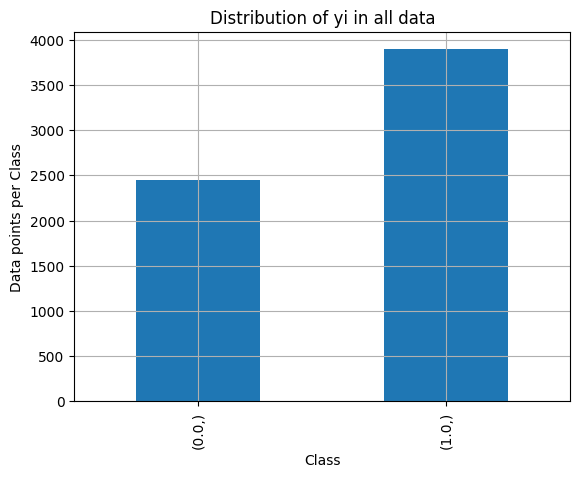

Number of data points in class 2 : 3891 ( 61.43 %)
Number of data points in class 1 : 2443 ( 38.57 %)


In [8]:
def display_distribution(class_distribution, split_data_type, data_shape):
    my_colors = 'rgbkymc'
    class_distribution.plot(kind='bar')
    plt.xlabel('Class')
    plt.ylabel('Data points per Class')
    plt.title(f'Distribution of yi in {split_data_type} data')
    plt.grid()
    plt.show()
    
    # ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
    # -(class_distribution.values): the minus sign will give us in decreasing order
    sorted_yi = np.argsort(-class_distribution.values)
    for i in sorted_yi:
        print('Number of data points in class', i+1, ':',class_distribution.values[i], '(', np.round((class_distribution.values[i]/data_shape*100), 3), '%)')

class_distribution = Y.value_counts().sort_index()
display_distribution(class_distribution=class_distribution, split_data_type="all", data_shape=Y.shape[0])

In [9]:
# Y = Y.replace({np.nan: 2})
# Y.tail()

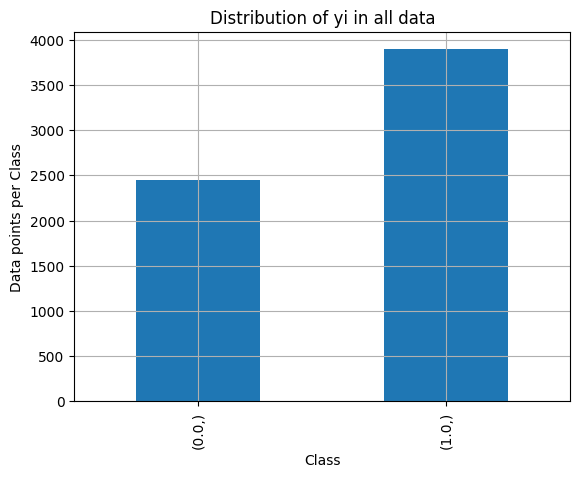

Number of data points in class 2 : 3891 ( 61.43 %)
Number of data points in class 1 : 2443 ( 38.57 %)


In [10]:
class_distribution = Y.value_counts().sort_index()
display_distribution(class_distribution=class_distribution, split_data_type="all", data_shape=Y.shape[0])

In [11]:
Y

,&-dbm
2,0.0
3,1.0
4,0.0
5,1.0
6,0.0
...,...
6331,1.0
6332,1.0
6333,0.0
6334,0.0


In [12]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y.values,
                                            test_size = 0.30,
                                            shuffle=False,
                                        )

print(X_train.shape, ' ',X_test.shape, " ", y_train.shape, ' ',y_test.shape)

(4433, 869)   (1901, 869)   (4433, 1)   (1901, 1)


In [13]:
def BestMLAlgo(x_train, x_test, y_train, y_test):
    """Identify best Algo on given dataset"""
    from prettytable import PrettyTable
    
    table = PrettyTable()
    table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1Score", "Log loss",
#                          "Roc Auc"
                        ]
                        
    import warnings
    warnings.filterwarnings("ignore")
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.linear_model import SGDClassifier
    from sklearn.calibration import CalibratedClassifierCV
    from xgboost import XGBRFClassifier
    import xgboost
    from sklearn import svm
    from sklearn.metrics import precision_score, accuracy_score, roc_auc_score,\
                                roc_curve, auc, log_loss, recall_score
    from sklearn.svm import SVC
    from lightgbm import LGBMClassifier
    from catboost import CatBoostClassifier, Pool

    
    base_models = {
#         'kNN': KNeighborsClassifier(),
#         'Naive Bayes': MultinomialNB(),
#         'Log. Reg.': LogisticRegression(),
#         'SVM Linear (SVC)': SVC(decision_function_shape='ovo',kernel = 'linear', C = 1),
#         'SVM Linear': SGDClassifier(class_weight='balanced', penalty='l2', loss='hinge', random_state=42),
#         'SVM Non-linear': svm.SVC(kernel='rbf'),
#         'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
#         'Gradient Boost': GradientBoostingClassifier(),
#         'Ada Boost': AdaBoostClassifier(),
#         "CatBoostClassifier": CatBoostClassifier(),
        "LGBMClassifier": LGBMClassifier(),
        'XGBoost': xgboost.XGBClassifier(),
        "XGBRFClassifier": xgboost.XGBRFClassifier()
    }          
        
    for model_name, model in base_models.items():
        try:
            print(model_name)
            model.fit(x_train, y_train)
            model = CalibratedClassifierCV(model, method="sigmoid")
            model.fit(x_train, y_train)
            y_pred_proba = model.predict_proba(x_test)
            y_pred = model.predict(x_test)

            # Performance metrics
            accuracy        = round(accuracy_score(y_test, y_pred), 2)
            precision       = round(precision_score(y_test, y_pred, average='micro'), 2)
            recall          = round(recall_score(y_test, y_pred, average='micro'), 2)
            f1_score        = round((2*recall*precision)/(recall+precision), 2)
            loss            = round(log_loss(y_test, y_pred_proba, eps=1e-15), 2) # , labels=model.classes
    #         roc_auc         = round(roc_auc_score(y_test, y_pred_proba, multi_class="ovo"), 2)        

            table.add_row([model_name, accuracy, precision, recall, f1_score, loss,
    #                        roc_auc
                          ])
        except:
            print(model_name, ": Model did not work")
    return table, model

In [14]:
# Full featuers
print(X_train.shape, " ", X_test.shape, " ", y_train.shape, " ",y_test.shape)
# print(y_train.value_counts())

table, model = BestMLAlgo( X_train, X_test, y_train, y_test)
table

(4433, 869)   (1901, 869)   (4433, 1)   (1901, 1)
Random Forest
LGBMClassifier
XGBoost
XGBRFClassifier


Model,Accuracy,Precision,Recall,F1Score,Log loss
Random Forest,0.85,0.85,0.85,0.85,0.38
LGBMClassifier,0.9,0.9,0.9,0.9,0.3
XGBoost,0.91,0.91,0.91,0.91,0.3
XGBRFClassifier,0.9,0.9,0.9,0.9,0.27


In [13]:
# Fearure importance filtered
print(X_train.shape, " ", X_test.shape, " ", y_train.shape, " ",y_test.shape)
print(y_train.value_counts())

table, model = BestMLAlgo( X_train, X_test, y_train, y_test)
table

(2545, 300)   (1092, 300)   (2545, 1)   (1092, 1)
&s-up_down_same
2                  1270
1                  1242
0                    33
dtype: int64
kNN
Naive Bayes
Naive Bayes : Model did not work
Log. Reg.
SVM Linear (SVC)
SVM Linear
SVM Non-linear
Decision Tree
Random Forest
Gradient Boost
Ada Boost
CatBoostClassifier
Learning rate set to 0.082988
0:	learn: 0.9794471	total: 244ms	remaining: 4m 4s
1:	learn: 0.8885816	total: 366ms	remaining: 3m 2s
2:	learn: 0.8050131	total: 495ms	remaining: 2m 44s
3:	learn: 0.7388071	total: 616ms	remaining: 2m 33s
4:	learn: 0.6777702	total: 743ms	remaining: 2m 27s
5:	learn: 0.6276070	total: 867ms	remaining: 2m 23s
6:	learn: 0.5846445	total: 999ms	remaining: 2m 21s
7:	learn: 0.5445609	total: 1.12s	remaining: 2m 19s
8:	learn: 0.5060430	total: 1.25s	remaining: 2m 17s
9:	learn: 0.4719718	total: 1.37s	remaining: 2m 16s
10:	learn: 0.4419793	total: 1.51s	remaining: 2m 15s
11:	learn: 0.4180952	total: 1.63s	remaining: 2m 14s
12:	learn: 0.3953266	total: 1.76s

Model,Accuracy,Precision,Recall,F1Score,Log loss,Roc Auc
kNN,0.92,0.92,0.92,0.92,0.24,0.98
Log. Reg.,0.94,0.94,0.94,0.94,0.14,1.0
SVM Linear (SVC),0.94,0.94,0.94,0.94,0.15,1.0
SVM Linear,0.95,0.95,0.95,0.95,0.14,0.99
SVM Non-linear,0.94,0.94,0.94,0.94,0.18,0.99
Decision Tree,0.93,0.93,0.93,0.93,0.23,0.98
Random Forest,0.95,0.95,0.95,0.95,0.14,0.99
Gradient Boost,0.94,0.94,0.94,0.94,0.12,1.0
Ada Boost,0.9,0.9,0.9,0.9,0.31,0.97
CatBoostClassifier,0.97,0.97,0.97,0.97,0.11,1.0
